# Pair Programming EDA

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

- Buscar un conjunto de datos a analizar

- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.

- Interpretación de los resultados.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("../archivos/telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
nomcol = {col: col.lower() for col in df.columns}

In [5]:
df.rename(columns = nomcol, inplace=True)

In [6]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
def exploracion(dataframe):
    '''
    Función que nos permite explorar varios aspectos de un dataframe mostrando
    unas filas, el numero de filas y columnas, los tipos de datos, la cantidad de nulos por columna,
    la cantidad de filas duplicadas, y los principales estadísticos.
        Parametros:
                dataframe (dataframe): un dataframe que queremos explorar
                nombre (string): un titulo para el dataframe
    '''
    print(".............................................")
    print(f"En el dataframe hay {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas.")
    print(".............................................")    
    print(f"5 filas aleatorias:")
    display(dataframe.sample(5))
    print(".............................................")
    print(f"Los tipos de data por columna del dataframe son:")
    display(dataframe.dtypes.reset_index())
    print(".............................................")
    print(f"La cantidad de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum().reset_index())
    print(".............................................")
    print(f"El porcentaje de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum() * 100 / dataframe.shape[0])
    print(".............................................")
    if dataframe.duplicated().sum() != 0:
        print(f"En el dataframe hay {dataframe.duplicated().sum()} filas duplicadas.")
    else:
        print(f"No hay filas duplicadas.")
    print(".............................................")
    print(f"Los principales estadísticos de las columnas numéricas son:")
    display(dataframe.describe())
    print(".............................................")
    print(f"Los principales estadísticos de las columnas categóricas son:")
    display(dataframe.describe(include=object))
    print(".............................................")

In [8]:
eda = exploracion(df)

.............................................
En el dataframe hay 7043 filas y 21 columnas.
.............................................
5 filas aleatorias:


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4384,8642-GVWRF,Female,0,Yes,No,2,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),79.70,165,Yes
5893,3549-ZTMNH,Male,0,Yes,Yes,12,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.00,269.65,No
1720,6407-UTSLV,Female,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),83.80,163.7,No
4489,8259-DZLIZ,Female,0,Yes,Yes,64,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Bank transfer (automatic),53.85,3399.85,No
4385,1930-BZLHI,Male,0,No,No,21,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.35,422.7,No


.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,customerid,object
1,gender,object
2,seniorcitizen,int64
3,partner,object
4,dependents,object
5,tenure,int64
6,phoneservice,object
7,multiplelines,object
8,internetservice,object
9,onlinesecurity,object


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,customerid,0
1,gender,0
2,seniorcitizen,0
3,partner,0
4,dependents,0
5,tenure,0
6,phoneservice,0
7,multiplelines,0
8,internetservice,0
9,onlinesecurity,0


.............................................
El porcentaje de nulos por columna del dataframe son:


customerid          0.0
gender              0.0
seniorcitizen       0.0
partner             0.0
dependents          0.0
tenure              0.0
phoneservice        0.0
multiplelines       0.0
internetservice     0.0
onlinesecurity      0.0
onlinebackup        0.0
deviceprotection    0.0
techsupport         0.0
streamingtv         0.0
streamingmovies     0.0
contract            0.0
paperlessbilling    0.0
paymentmethod       0.0
monthlycharges      0.0
totalcharges        0.0
churn               0.0
dtype: float64

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


.............................................
Los principales estadísticos de las columnas categóricas son:


,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


.............................................


In [9]:
df[['streamingmovies', 'streamingtv']].value_counts()

streamingmovies      streamingtv        
No                   No                     2018
Yes                  Yes                    1940
No internet service  No internet service    1526
Yes                  No                      792
No                   Yes                     767
Name: count, dtype: int64

In [10]:
df['streamingmovies'].value_counts()

streamingmovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [11]:
df['streamingtv'].value_counts()

streamingtv
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [12]:
df.sample(10)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4357,7998-ZLXWN,Female,0,Yes,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.45,330.8,No
4642,5458-CQJTA,Male,0,Yes,Yes,65,Yes,No,DSL,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),74.80,4820.15,Yes
3484,2921-XWDJH,Female,1,Yes,No,38,Yes,No,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.45,3147.15,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
943,6115-ZTBFQ,Female,0,Yes,No,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),65.50,4919.7,No
3864,4817-VYYWS,Female,0,No,No,30,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.20,2983.8,Yes
845,0422-OHQHQ,Female,0,Yes,Yes,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.55,295.95,No
2061,4958-GZWIY,Male,0,Yes,Yes,7,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,48.70,340.25,Yes
4092,0670-KDOMA,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,20.25,No
6336,8647-SDTWQ,Male,0,Yes,Yes,57,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,No


In [13]:
df['contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [14]:
df['streamingtv'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
df['streamingmovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
numericas = df.select_dtypes(include=np.number)

In [17]:
mask = np.triu(np.ones_like(numericas.corr(),dtype = np.bool_))

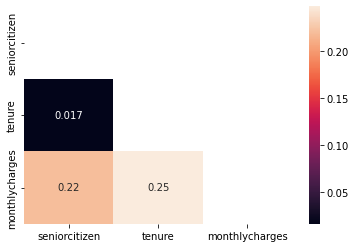

In [18]:
sns.heatmap(numericas.corr(), annot=True, mask=mask);

In [19]:
def similar_variables(lista_variables,plot = True):
    for columna in lista_variables:
        print(' Los valores únicos para la variable',columna, 'son:', list( df[columna].unique()))
        value_counts = df[columna].value_counts()
        if plot == True:
            plt.figure()
            value_counts.plot.pie(figsize=(8,8))
        else:
            pass

 Los valores únicos para la variable streamingtv son: ['No', 'Yes', 'No internet service']
 Los valores únicos para la variable streamingmovies son: ['No', 'Yes', 'No internet service']


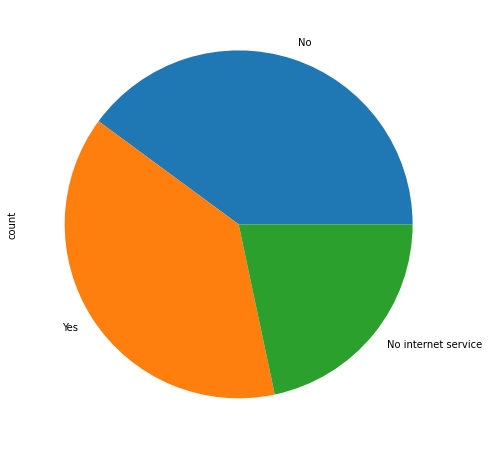

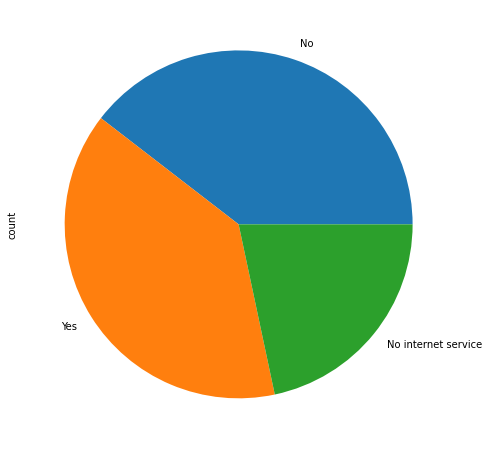

In [20]:
streaminglist = ['streamingtv','streamingmovies']
similar_variables(streaminglist)

Podemos pensar en eliminar alguna de estas dos columnas, ya que sus porcentajes son muy similares y pueden resultar redundantes.

<Figure size 1080x1080 with 0 Axes>

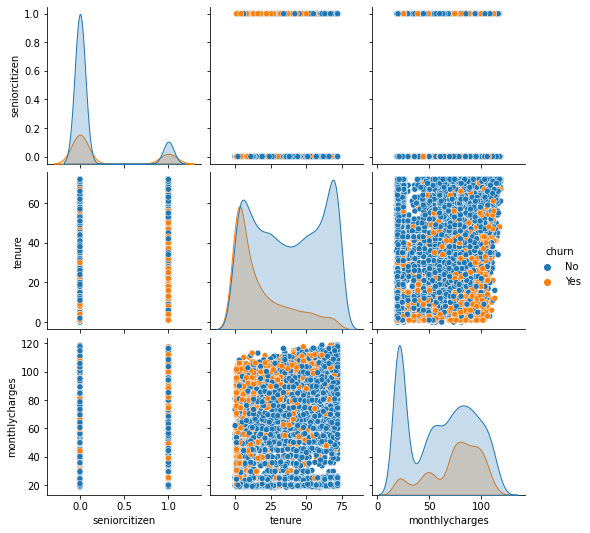

In [21]:
plt.figure(figsize=(15, 15))

sns.pairplot(df, hue= 'churn')

In [22]:
categoricas = df.select_dtypes(exclude=np.number)
categoricas.drop('churn', axis=1, inplace=True)

In [23]:
len(categoricas.columns)

17

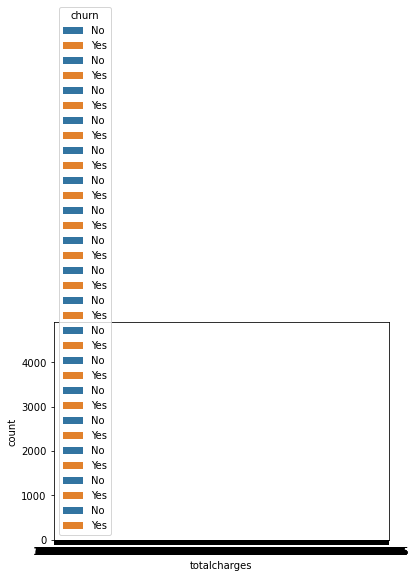

In [28]:
for col in categoricas.columns:
    sns.countplot(x=col, data=df, hue='churn')